### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import sklearn.datasets as skl_data
from PIL import Image

from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV



## Processing Images

### Function for Converting Train Dataset JPGs into Pixel Data

Each image is 208x176 pixels and the number of files for each category in the train and test dataset are below. Therefore, there will be 36608 pixels of data. There are 5121 jpg files total in the train dataset. 

I will use these facts to initialize a 2 dimensional array (5121 x 36608)

In [2]:
def JPG2Pixel_Training_Data(directory):
    train_complete_array = np.zeros((5121,36608))
    i = 0
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.jpg'):
                train_file_path = os.path.join(root, filename)
                train_pixelated_image = Image.open(train_file_path)
                train_numpy_array = np.asarray(train_pixelated_image)
                train_reshaped_image = train_numpy_array.reshape(1, -1)
                train_complete_array[i] = train_reshaped_image
                i += 1
    return train_complete_array

In [3]:
Train_Dataset = "/Users/bigyambat/Desktop/TRGN_ML/Alzheimer_Dataset/train"


In [4]:
final_train_array = JPG2Pixel_Training_Data(Train_Dataset)

In [5]:
np.shape(final_train_array)

(5121, 36608)

### Function for Converting Test Datset JPG into Pixel Data

Each image is 208x176 pixels and the number of files for each category in the train and test dataset are below. Therefore, there will be 36608 pixels of data. There are 1279 jpg files in the test dataset.

I will use these facts to initialize a 2 dimensional array (1279 x 36608)

In [6]:
def JPG2Pixel_Test_Data(directory):
    test_complete_array = np.zeros([1279,36608])
    i = 0
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.jpg'):
                test_file_path = os.path.join(root, filename)
                test_pixelated_image = Image.open(test_file_path)
                test_numpy_array = np.asarray(test_pixelated_image)
                test_reshaped_image = test_numpy_array.reshape(1, -1)
                test_complete_array[i] = test_reshaped_image
                i += 1
    return test_complete_array

In [7]:
Test_Dataset = "/Users/bigyambat/Desktop/TRGN_ML/Alzheimer_Dataset/test"

In [8]:
final_test_array = JPG2Pixel_Test_Data(Test_Dataset)

In [9]:
np.shape(final_test_array)

(1279, 36608)

## Data Wrangling

### Creating Dataframe for Train Dataset

In [10]:
train_df = pd.DataFrame(final_train_array)

In [11]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,36598,36599,36600,36601,36602,36603,36604,36605,36606,36607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
train_df.max(axis='columns')

0       255.0
1       255.0
2       255.0
3       255.0
4       255.0
        ...  
5116    252.0
5117    255.0
5118    255.0
5119    255.0
5120    255.0
Length: 5121, dtype: float64

In [13]:
train_df.max(axis='columns').max()

255.0

Based on the value above, the train dataset has a maximum pixel value of 255. 

### Creating Dataframe for Test Dataset

In [14]:
test_df = pd.DataFrame(final_test_array)

In [15]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,36598,36599,36600,36601,36602,36603,36604,36605,36606,36607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
test_df.max(axis ='columns')

0       252.0
1       255.0
2       255.0
3       255.0
4       255.0
        ...  
1274    253.0
1275    251.0
1276    254.0
1277    255.0
1278    248.0
Length: 1279, dtype: float64

In [17]:
test_df.max(axis ='columns').max()

255.0

Based on the value above, the test dataset has a maximum pixel value of 255. 

### Adding Labels to Data

The JPG2Pixel functions above iterated through the test and the train class folders in the following order

1. Very Mild Demebted
2. Moderate Demented
3. Mild Demented
4. Non Demented

Based on these classes (and the number of files for each class), I am able to deduce the labels for each row of the train_df and test_df

### Train Dataframe

In [18]:
train_df['Labels']= 'Classes'

In [19]:
train_df.loc[0:1791,'Labels'] = 'Very Mild Demented'
train_df.loc[1791:1843,'Labels'] = 'Moderate Demented'
train_df.loc[1843:2560,'Labels'] = 'Mild Demented'
train_df.loc[2560:5120,'Labels'] = 'Non Demented'


In [20]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented


### Test Dataframe

In [21]:
test_df['Labels']= 'Classes'

In [22]:
test_df.loc[0:447,'Labels'] = 'Very Mild Demented'
test_df.loc[447:459,'Labels'] = 'Moderate Demented'
test_df.loc[459:638,'Labels'] = 'Mild Demented'
test_df.loc[638:1278,'Labels'] = 'Non Demented'

In [23]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented


### Visualizing the Data

<function matplotlib.pyplot.show(close=None, block=None)>

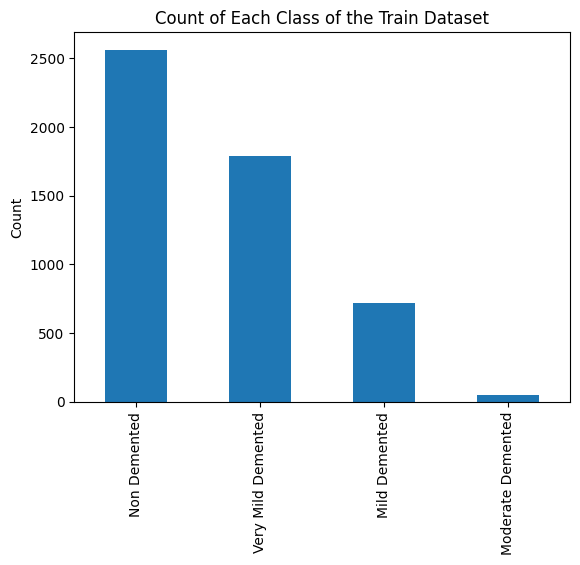

In [24]:
train_df['Labels'].value_counts().plot(kind='bar', ylabel = "Count", title="Count of Each Class of the Train Dataset")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

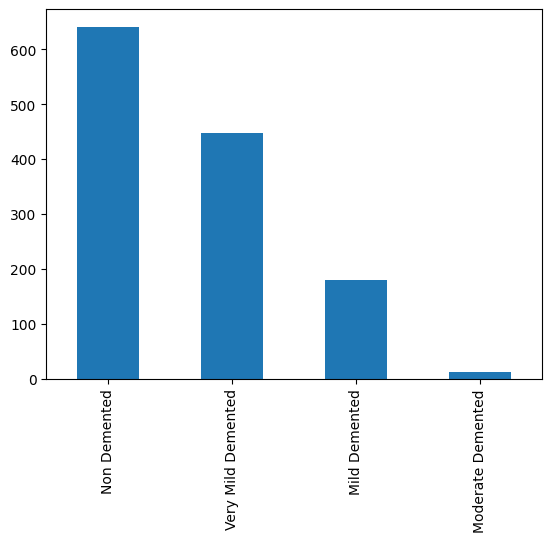

In [25]:
test_df['Labels'].value_counts().plot(kind='bar')
plt.show

From the figures above, its clear that both the train and test dataset are imbalanced. The moderate demented class in particular contains drastically lower samples than the other classes in the dataset. This is a common issue called imbalanced classification. Therefore, I will need to perform random oversampling to compensate for this. However, since the moderate demented class has an order of magintude lower data, oversampling this class might induce problems in the machine learning model. In general, oversampling can lead to overfitting issues in the ML model. Therefore, I will be removing the Moderate Demented class from both the training and test datasets. The model will be trained for the following 3 classes: Non Demented, Very Mild Demented, and Mild Demented. I will be oversampling the Very Mild Demented and Mild Demented classes to balance both the train and test dataset. 

In [26]:
train_df.drop(train_df[train_df["Labels"] == 'Moderate Demented'].index, inplace=True)
train_df.Labels.unique()
train_df

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented


In [27]:
test_df.drop(test_df[test_df["Labels"] == 'Moderate Demented'].index, inplace=True)
test_df.Labels.unique()
test_df

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented


Now, there are 5069 samples for the train dataset and 1267 samples for the test dataset

### Normalization

Before oversampling the data, the train and test datasets should be normalized. ML models that are based on pixel data especially is tend to be sensitive to feature scaling. Normally, any scaling method like (StandardScaler from sklearn.preprocessing) would be sufficient. However, due to the structure of the data, a simpler method can be used to scale the data. Based on the Creating Dataframe Section, the maximum pixel value both the train and test dataset is 255. So dividing all values of the dataset by 255, will normalize the data. Using this method, values will range from 0-1 for each pixel. 

In [28]:
train_df.loc[:, 0:36607] = train_df.loc[:, 0:36607] / 255
train_df.max(axis ='columns')

/var/folders/gd/2x012bcn7c3cyfr5829j_dkm0000gn/T/ipykernel_14722/2489170132.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.max(axis ='columns')


0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
5116    0.988235
5117    1.000000
5118    1.000000
5119    1.000000
5120    1.000000
Length: 5069, dtype: float64

In [29]:
test_df.loc[:, 0:36607] = test_df.loc[:, 0:36607] / 255
test_df.max(axis ='columns')

/var/folders/gd/2x012bcn7c3cyfr5829j_dkm0000gn/T/ipykernel_14722/1919608565.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df.max(axis ='columns')


0       0.988235
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1274    0.992157
1275    0.984314
1276    0.996078
1277    1.000000
1278    0.972549
Length: 1267, dtype: float64

## Model Selection

As mentioned, I will be using scikit-learn modules for machine learning. From here onwards, these modules will be used to oversample, initialize, run quality checks, and optimize the model. Before doing this, I will be defining variables for the model. Historically, X is the features and Y is the labels. I will do this for both the train and test datasets. The data must be formatted this in this manner to use scikit-learn modules. You also want to split the dataset before running any oversampling techniques (otherwise there will be repeat data in the test and train datasets)

In [30]:
X_Train = train_df.drop(columns="Labels")
Y_Train = train_df.Labels

In [31]:
X_Train

,0,1,2,3,4,5,6,7,8,9,...,36598,36599,36600,36601,36602,36603,36604,36605,36606,36607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
Y_Train

0       Very Mild Demented
1       Very Mild Demented
2       Very Mild Demented
3       Very Mild Demented
4       Very Mild Demented
               ...        
5116          Non Demented
5117          Non Demented
5118          Non Demented
5119          Non Demented
5120          Non Demented
Name: Labels, Length: 5069, dtype: object

In [33]:
X_Test = test_df.drop(columns="Labels")
Y_Test = test_df.Labels

In [34]:
X_Test

,0,1,2,3,4,5,6,7,8,9,...,36598,36599,36600,36601,36602,36603,36604,36605,36606,36607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
Y_Test

0       Very Mild Demented
1       Very Mild Demented
2       Very Mild Demented
3       Very Mild Demented
4       Very Mild Demented
               ...        
1274          Non Demented
1275          Non Demented
1276          Non Demented
1277          Non Demented
1278          Non Demented
Name: Labels, Length: 1267, dtype: object

### Synthetic Minority Oversampling Technique

Random Oversampling is often used to correct for an imbalanced dataset. Generally, Random Oversampling is performed on the training dataset only. I will be using Random Oversampling, which duplicates examples from the minority classes. Random samples from the minority class are added (with replacement) to the train dataset. This process is repeated until the dataset classes are equal. In our case, there are now 3 classes for the dataset (refer to previous section). Oversampling will still work even with multi-class classiciation (where there is more than 1 minority group). 

I will be using the imblearn Library which to do random oversampling. Use the command below to install using pip

In [36]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.over_sampling import RandomOverSampler


In [38]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_Over, Y_Over = oversample.fit_resample(X_Train, Y_Train)


In [39]:
print(len(Y_Train))
print(len(Y_Over))

5069
6913


<AxesSubplot: >

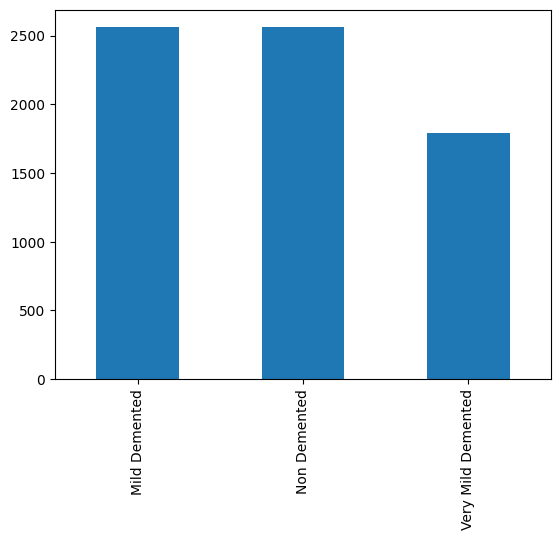

In [40]:
Y_Over_df = pd.DataFrame(Y_Over)

Y_Over_df['Labels'].value_counts().plot(kind='bar')

It looks like the Very Mild Demented class didn't get oversampled, so we need to run it again

In [41]:
X_Over, Y_Over = oversample.fit_resample(X_Over, Y_Over)

<AxesSubplot: >

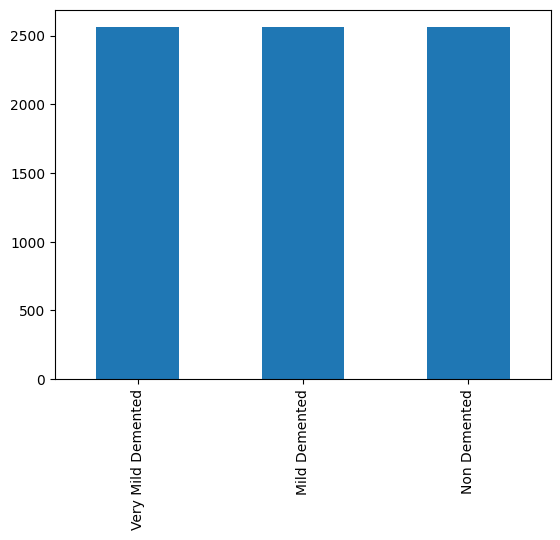

In [42]:
Y_Over_df = pd.DataFrame(Y_Over)

Y_Over_df['Labels'].value_counts().plot(kind='bar')

Now that the dataset is balanced. Lets rename the X_Over and Y_Over to X_Train and Y_Train

In [43]:
X_Train = X_Over
Y_Train = Y_Over

### Initializing the Classification Model

For the classification model, I will be using an MLP based models (Multi-Layer Preceptrons) from Scikit-Learn. Generally, MLPs are a great model for pixels since individual pixel values can be fed directly into the input layer of the MLP model. The Scikit Learn module has the following 2 MLP models with unique featuers: 

1. MLPCLassifier => MLP Model that trains using Backpropogation
2. MLPRegressor => MLP Model that trains using Backpropogation without an acitvation function in the output layer. 

In [44]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,), max_iter=500, verbose=1, random_state=1)

In [45]:
clf.fit(X_Train, Y_Train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       366123     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16793D+00    |proj g|=  1.46564D-01


 This problem is unconstrained.



At iterate    1    f=  1.12498D+00    |proj g|=  1.20921D-01

At iterate    2    f=  1.10135D+00    |proj g|=  4.44938D-02

At iterate    3    f=  1.09969D+00    |proj g|=  5.29107D-02

At iterate    4    f=  1.09925D+00    |proj g|=  5.93774D-02

At iterate    5    f=  1.09367D+00    |proj g|=  6.35972D-02

At iterate    6    f=  1.08632D+00    |proj g|=  7.51090D-02

At iterate    7    f=  1.08189D+00    |proj g|=  7.53016D-02

At iterate    8    f=  1.07830D+00    |proj g|=  9.58082D-02

At iterate    9    f=  1.07505D+00    |proj g|=  1.17526D-01

At iterate   10    f=  1.06951D+00    |proj g|=  1.35552D-01

At iterate   11    f=  1.06008D+00    |proj g|=  1.78614D-01

At iterate   12    f=  1.04326D+00    |proj g|=  2.54324D-01

At iterate   13    f=  9.72405D-01    |proj g|=  9.70500D-02

At iterate   14    f=  9.62657D-01    |proj g|=  1.32687D-01

At iterate   15    f=  9.37067D-01    |proj g|=  1.41123D-01

At iterate   16    f=  9.12271D-01    |proj g|=  4.24963D-02

At iter

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10,), max_iter=500,
              random_state=1, solver='lbfgs', verbose=1)

It looks like the model has converged at around 460 iterations. Note: Convergence will always vary each time the model fits

In [52]:
Y_Pred = clf.predict(X_Test)

### Confusion Matrix and Metrics on Test Dataset

Lets check the accuracy of the model using the sklearn.metrics module 

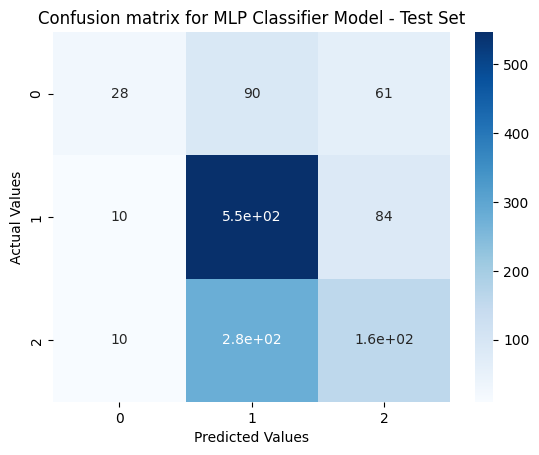

In [53]:
cm = confusion_matrix(Y_Test, Y_Pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion matrix for MLP Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [54]:
score = accuracy_score(Y_Test, Y_Pred)*100
print("Accuracy on test set: {}%".format(score))
print(classification_report(Y_Test, Y_Pred))

Accuracy on test set: 57.77426992896606%
                    precision    recall  f1-score   support

     Mild Demented       0.58      0.16      0.25       179
      Non Demented       0.60      0.85      0.70       641
Very Mild Demented       0.52      0.35      0.42       447

          accuracy                           0.58      1267
         macro avg       0.57      0.45      0.46      1267
      weighted avg       0.57      0.58      0.54      1267



This is a quite low accuracy, but is expected since the options for the MLPClassifier were aquired from Sklearn's MLPClassifier documentation. To gain further information, its necessary to look at the Training Set Metrics 

### Confusion Matrix and Metrics on Training Set

Lets look at the accuracy metrics for the training set. If the accuracy is higher than or equal to the test set, then there is an overfitting issue

In [55]:
Y_Train_Pred = clf.predict(X_Train)

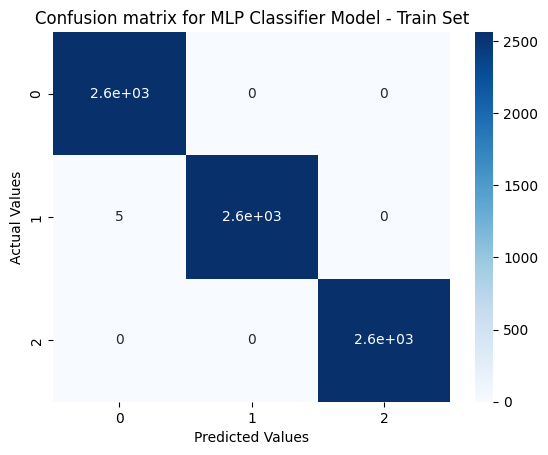

In [56]:
cm = confusion_matrix(Y_Train, Y_Train_Pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion matrix for MLP Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [57]:
score = accuracy_score(Y_Train, Y_Train_Pred)*100
print("Accuracy on test set: {}%".format(score))
print(classification_report(Y_Train, Y_Train_Pred))

Accuracy on test set: 99.9349212547182%
                    precision    recall  f1-score   support

     Mild Demented       1.00      1.00      1.00      2561
      Non Demented       1.00      1.00      1.00      2561
Very Mild Demented       1.00      1.00      1.00      2561

          accuracy                           1.00      7683
         macro avg       1.00      1.00      1.00      7683
      weighted avg       1.00      1.00      1.00      7683



A 100% accuracy on the training set combined with the low accuracy of the test dataset indicate significant overfitting. In general, it's important to note that achieving 100% accuracy the training and test sets is usually a sign of overfitting, as the model may have memorized the training data and won't generalize well to new, unseen data. Here, it is clear that the hyperparameter values are clearly causing an overfitting. Therefore, we will need to do some significant hyperparameter tuning to avoid this issue.

### Hyperparameter Tuning

I will be tuning the following 4 hyperparameters of the model:

solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,), max_iter=500, verbose=1, random_state=1)

1. Solver is the method of weight optimization (default=’adam’)
    * ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
    * ‘sgd’ refers to stochastic gradient descent.
    * ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

2. Alpha is the strength of the Regularization (default=0.0001)
    * This hyperparameter is specific to L2 Regularization

3. Hidden Layer Size is the number of perceptrons for each layer by the number of layers (default=(100,))
    * ie A (10,10) Size means 10 layers with 10 preceptrons each

4. Max Iterator represents the epoch (number of times the whole dataset is fed to the model) (default=200)
    * Increasing the Max Iterator allows the model to learn more from the data. However, an overly large value can lead to overfitting issues

Here are my general intuition for each hyperparameter:

1. According to sklearn's documentation, "the default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better"[1]. Unusually, previous testing revealed the runtime for adam and sgd were signficiantly higher than lbfgs in this particular model. Due to time constraints, I will only be focusing on the lbfgs optimization method.

2. Since the model is overfitting, it might be necessary to increase the hyper-parameter value alpha. Regularization is a technique used to prevent overfitting in a model by adding a penalty term to the loss function that controls the complexity of the model. The regularization term is designed to reduce the magnitude of the coefficients or weights of the model, which can help to reduce the model's tendency to overfit the training data.A higher alpha value would penalize overfitting the data

3. The hidden layer size of (10,) implies 1 layer of 10 preceptrons. This is quite shallow model. Generally, the bigger and more layers increases the depth of the learning, but can lead to overfitting issues. Therefore, I will test the hiddn layers combinations from to (10,) or (50,) and I will compensate for an increase in overfitting by adjusting alpha

4. I suspect that the Max_Iterator hyperparameter is also contributing to the overfitting. However, this particular MLP model fails to converge with a Max_Iterator less than 300. So, its necessary to try have at least 400 for this hyperparameter. I will also compensate for the expected increase in overfitting with a higher range of alpha values. 

### GridSearchCV

GridSearchCV is a sklearn function that is useful for hyperparameter tuning and cross-validation. It performs an exhaustive search over a specified range of hyperparameters to find the best combination of hyperparameters that optimize a specified evaluation metric, such as accuracy or F1-score. The GridSearchCV function works by creating a grid of all possible hyperparameter combinations, and then evaluating each combination using cross-validation.

Below I am defining the hyperparameters to search over

In [69]:
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (10, 10)],
    'solver': ['lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [900]
}

Here I am creating the GridSearchCV Object

In [70]:
grid_search = GridSearchCV(MLPClassifier(), param_grid=parameters, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, pre_dispatch='2*n_jobs', refit=True)


Fit the GridSearchCV object to the training data. Note => refit=TRUE uses the entire training set to refit the model after identifying the best hyperparameter combinations 

In [71]:
grid_search.fit(X_Train, Y_Train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END alpha=0.0001, hidden_layer_sizes=(100,), max_iter=900, solver=lbfgs; total time=314.8min
[CV] END alpha=0.01, hidden_layer_sizes=(100,), max_iter=900, solver=lbfgs; total time=309.2min
[CV] END alpha=0.1, hidden_layer_sizes=(10, 10), max_iter=900, solver=lbfgs; total time=59.8min
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10), max_iter=900, solver=lbfgs; total time=27.1min
[CV] END alpha=0.0001, hidden_layer_sizes=(10, 10), max_iter=900, solver=lbfgs; total time=53.9min
[CV] END alpha=0.001, hidden_layer_sizes=(50,), max_iter=900, solver=lbfgs; total time=146.3min
[CV] END alpha=0.001, hidden_layer_sizes=(10, 10), max_iter=900, solver=lbfgs; total time=43.5min
[CV] END alpha=0.01, hidden_layer_sizes=(50,), max_iter=900, solver=lbfgs; total time=160.5min
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10), max_iter=900, solver=lbfgs; total time=19.3min
[CV] END alpha=0.01, hidden_layer_sizes=(10, 10), max_iter=900, s

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(50,), (100,), (10, 10)],
                         'max_iter': [900], 'solver': ['lbfgs']},
             scoring='accuracy', verbose=2)

The following is the best hyperparameter combination and its associated accuracy scores

In [72]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Grid search results: ", grid_search.cv_results_)

Best hyperparameters:  {'alpha': 0.1, 'hidden_layer_sizes': (50,), 'max_iter': 900, 'solver': 'lbfgs'}
Best cross-validation score:  0.9873747234153326
Grid search results:  {'mean_fit_time': array([ 7786.85632277, 15910.77009026,  3102.0748287 ,  8051.49438739,
       21226.35227013,  1780.09776791, 10615.21174494, 15235.44075871,
        1759.79808879, 13148.83304866, 11069.73507166,  3579.81016445]), 'std_fit_time': array([ 493.90706236, 4612.91232731, 1166.75863276,  731.19222445,
       3359.21319765,  718.2857956 , 4045.66311661, 2668.96388455,
        822.24740324,  155.65423707, 1474.09101325, 1480.16172456]), 'mean_score_time': array([12.66756399, 15.43299111,  9.61759369, 13.3701299 , 11.85941227,
       10.11440142,  9.67347741, 13.85181896,  9.18504953,  6.24706984,
        2.11955229,  8.06298264]), 'std_score_time': array([0.71319727, 0.89664358, 1.44464612, 1.33019629, 1.38148296,
       2.15083618, 1.12222771, 0.96001877, 1.26565703, 3.1578362 ,
       0.38584037, 2.108

The GridSearchCV was able to find a hyperparameter combination with 98.7% accuracy on the train dataset. Counterintuitivly, this is a much better result that the 100% training set accuracy attained earlier since 98.7% accuracy indicates that the MLP model is not overfitting anymore. However, testing data must be used to validate before confirming the model's efficacy

Lets visualize the hyperparameters and their mean test score to see trends

In [114]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Filter the DataFrame to include only the columns of interest
columns = ['param_alpha', 'param_hidden_layer_sizes', 'mean_fit_time', 'mean_test_score']
cv_results_df = cv_results_df[columns]

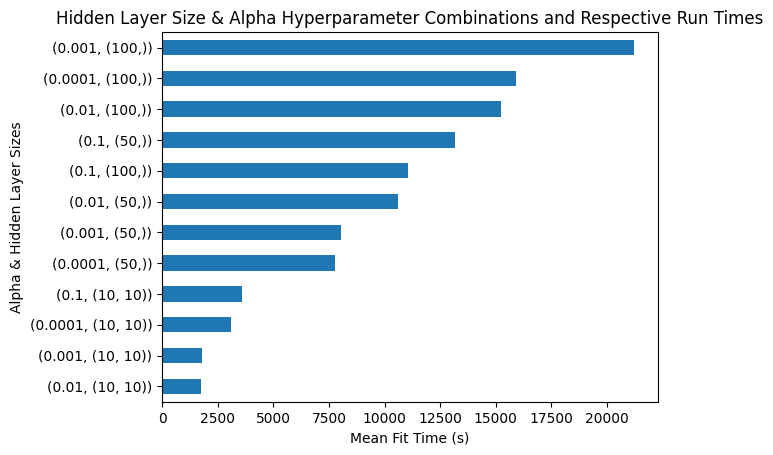

In [115]:
# Set the DataFrame index to a combination of alpha and hidden_layer_sizes
cv_results_df = cv_results_df.set_index(['param_alpha', 'param_hidden_layer_sizes'])

# Sort the DataFrame by mean_fit_time in ascending order
cv_results_df = cv_results_df.sort_values(by='mean_fit_time', ascending=True)

# Plot the mean_fit_time as a horizontal bar chart
cv_results_df['mean_fit_time'].plot(kind='barh')
plt.xlabel('Mean Fit Time (s)')
plt.ylabel('Alpha & Hidden Layer Sizes')
plt.title('Hidden Layer Size & Alpha Hyperparameter Combinations and Respective Run Times')
plt.show()

Hidden Layer Size is positively correlated to runtime of the ML Model. You can a similar trend for the alpha value (with lower alpha values contributing to an increase in runtime). This makes sense since a lower alpha value corresponds to an increased penalty for overfitting (which would require more computational power)

### Evaluating Model on Best Hyperparameters

The grid_search.fit has already trained the model on the training data. The grid_search object can now be used as an instance of the MLP Model. To test for efficacy, lets evaluate the test dataset using the best hyperparameter combination

In [118]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_Test, Y_Test)
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.5943172849250198
